In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import ipywidgets as widgets
from PIL import Image
import os
import keras
import io
import tqdm
import cv2
import tensorflow as tf

In [2]:
X_train = []
y_train = []
image_size = 150

folderPath ='E:\Cow Disease Prediction\healthycows'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(0)
folderPath ='E:\Cow Disease Prediction\lumpycows'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(1)

In [3]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(936, 150, 150, 3)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)

In [5]:
y_train.shape

(842,)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [8]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='Adam',
              metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [10]:
history=model.fit(X_train,y_train,epochs=27,validation_split=.1,callbacks=[best_model])

Epoch 1/27


24/24 [==============================] - 27s 1s/step - loss: 4.0937 - accuracy: 0.5152 - val_loss: 0.8589 - val_accuracy: 0.4941
Epoch 2/27
24/24 [==============================] - 22s 901ms/step - loss: 0.7005 - accuracy: 0.5416 - val_loss: 1.0018 - val_accuracy: 0.5059
Epoch 3/27
24/24 [==============================] - 21s 870ms/step - loss: 0.6990 - accuracy: 0.5429 - val_loss: 0.8747 - val_accuracy: 0.5059
Epoch 4/27
24/24 [==============================] - 21s 863ms/step - loss: 0.6892 - accuracy: 0.5258 - val_loss: 0.7646 - val_accuracy: 0.6824
Epoch 5/27
24/24 [==============================] - 21s 865ms/step - loss: 0.6579 - accuracy: 0.5984 - val_loss: 0.7394 - val_accuracy: 0.6588
Epoch 6/27
24/24 [==============================] - 21s 862ms/step - loss: 0.6229 - accuracy: 0.6592 - val_loss: 0.5645 - val_accuracy: 0.7882
Epoch 7/27
24/24 [==============================] - 21s 863ms/step - loss: 0.6505 - accuracy: 0.6380 - val_loss: 0.7110 - val_accuracy: 0.4941


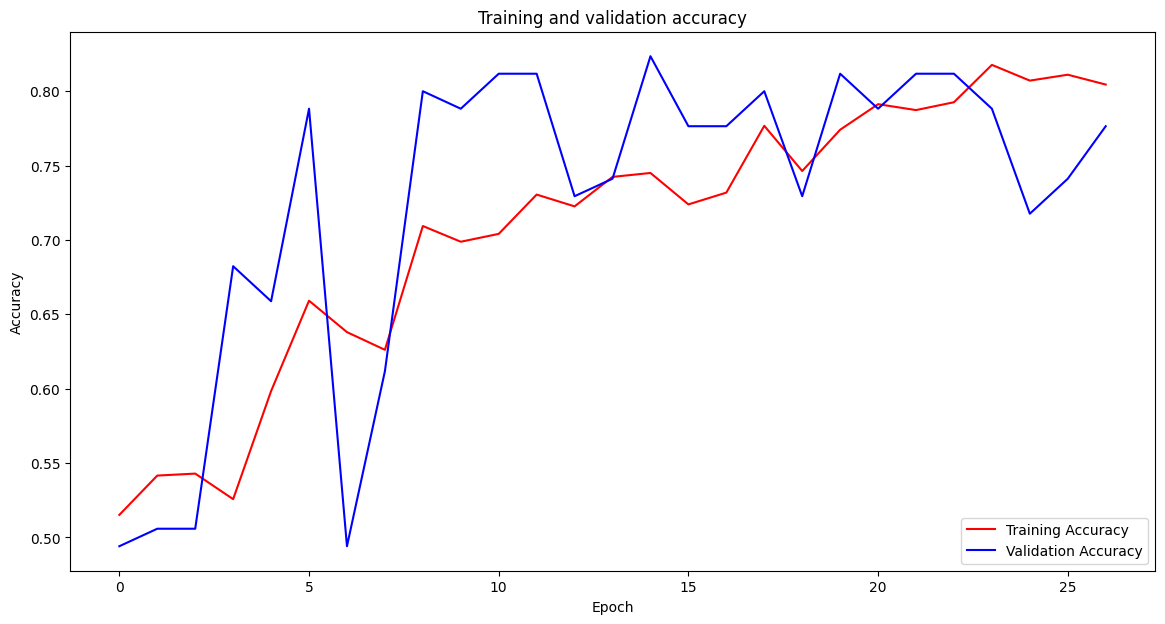

In [11]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

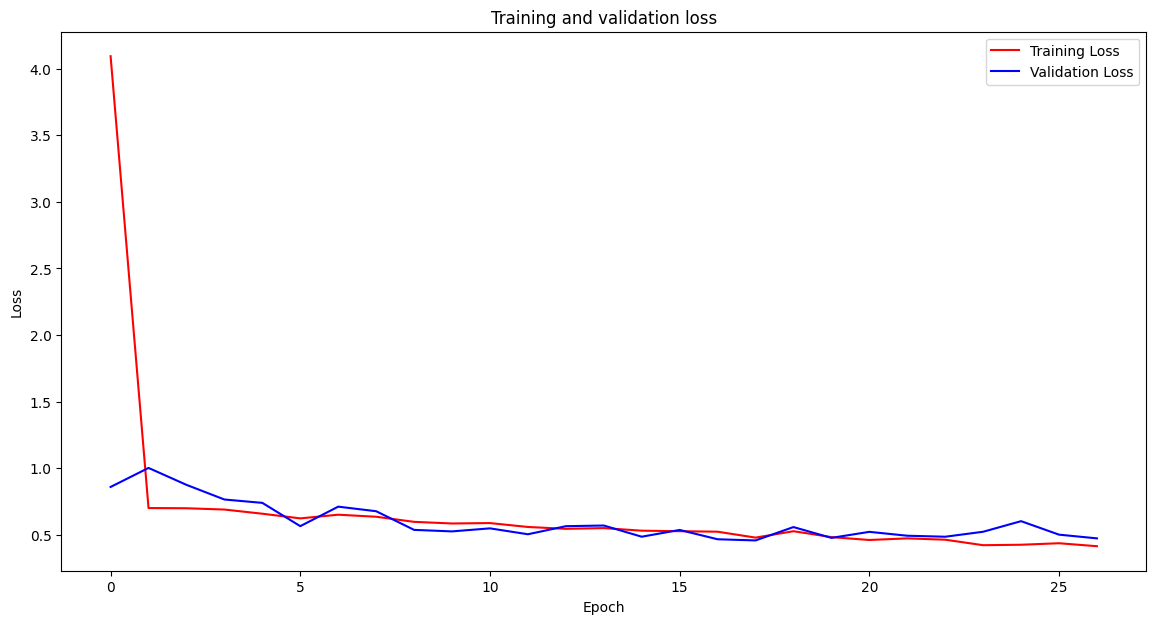

In [12]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [13]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

3/3 [==============================] - 1s 167ms/step


In [14]:
y_test.shape
pred.shape

(94,)

In [15]:
accuracy = np.sum(pred==y_test)/np.size(pred)
print("Accuracy on testing dataset: {:.2f}%".format(accuracy*100))

Accuracy on testing dataset: 73.40%
